In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import json
from networkx.readwrite import json_graph

link_df = pd.read_csv("G:\\공유 드라이브\\NSL\\10. NSLab\\00. 개인 공간\\50. 조승완\\AA_졸업개발\\Data\\cor_link.csv", encoding='cp949')
node_df = pd.read_csv("G:\\공유 드라이브\\NSL\\10. NSLab\\00. 개인 공간\\50. 조승완\\AA_졸업개발\\Data\\cor_node.csv", encoding='cp949')

print(link_df)
print(link_df)

         LINK_ID      F_NODE      T_NODE  LANES  ROAD_RANK  ROAD_TYPE ROAD_NO  \
0     2333847700  2330351500  2330362700      1        107          0       -   
1     2333448001  2330210100  2330208801      1        106          0     311   
2     2334020800  2330412100  2330412000      1        107          0       -   
3     2330041428  2330013612  2330013611      3        107          0       -   
4     2334113100  2330464200  2330463800      1        107          0       -   
...          ...         ...         ...    ...        ...        ...     ...   
3130  2333240200  2330089700  2330092300      1        107          0       -   
3131  2333027000  2330074200  2330074300      1        107          0       -   
3132  2334106600  2330464300  2330464600      1        107          0       -   
3133  2334204800  2330448900  2330449000      1        107          0       -   
3134  2334104000  2330461100  2330461300      1        107          0       -   

      ROAD_NAME  ROAD_USE  

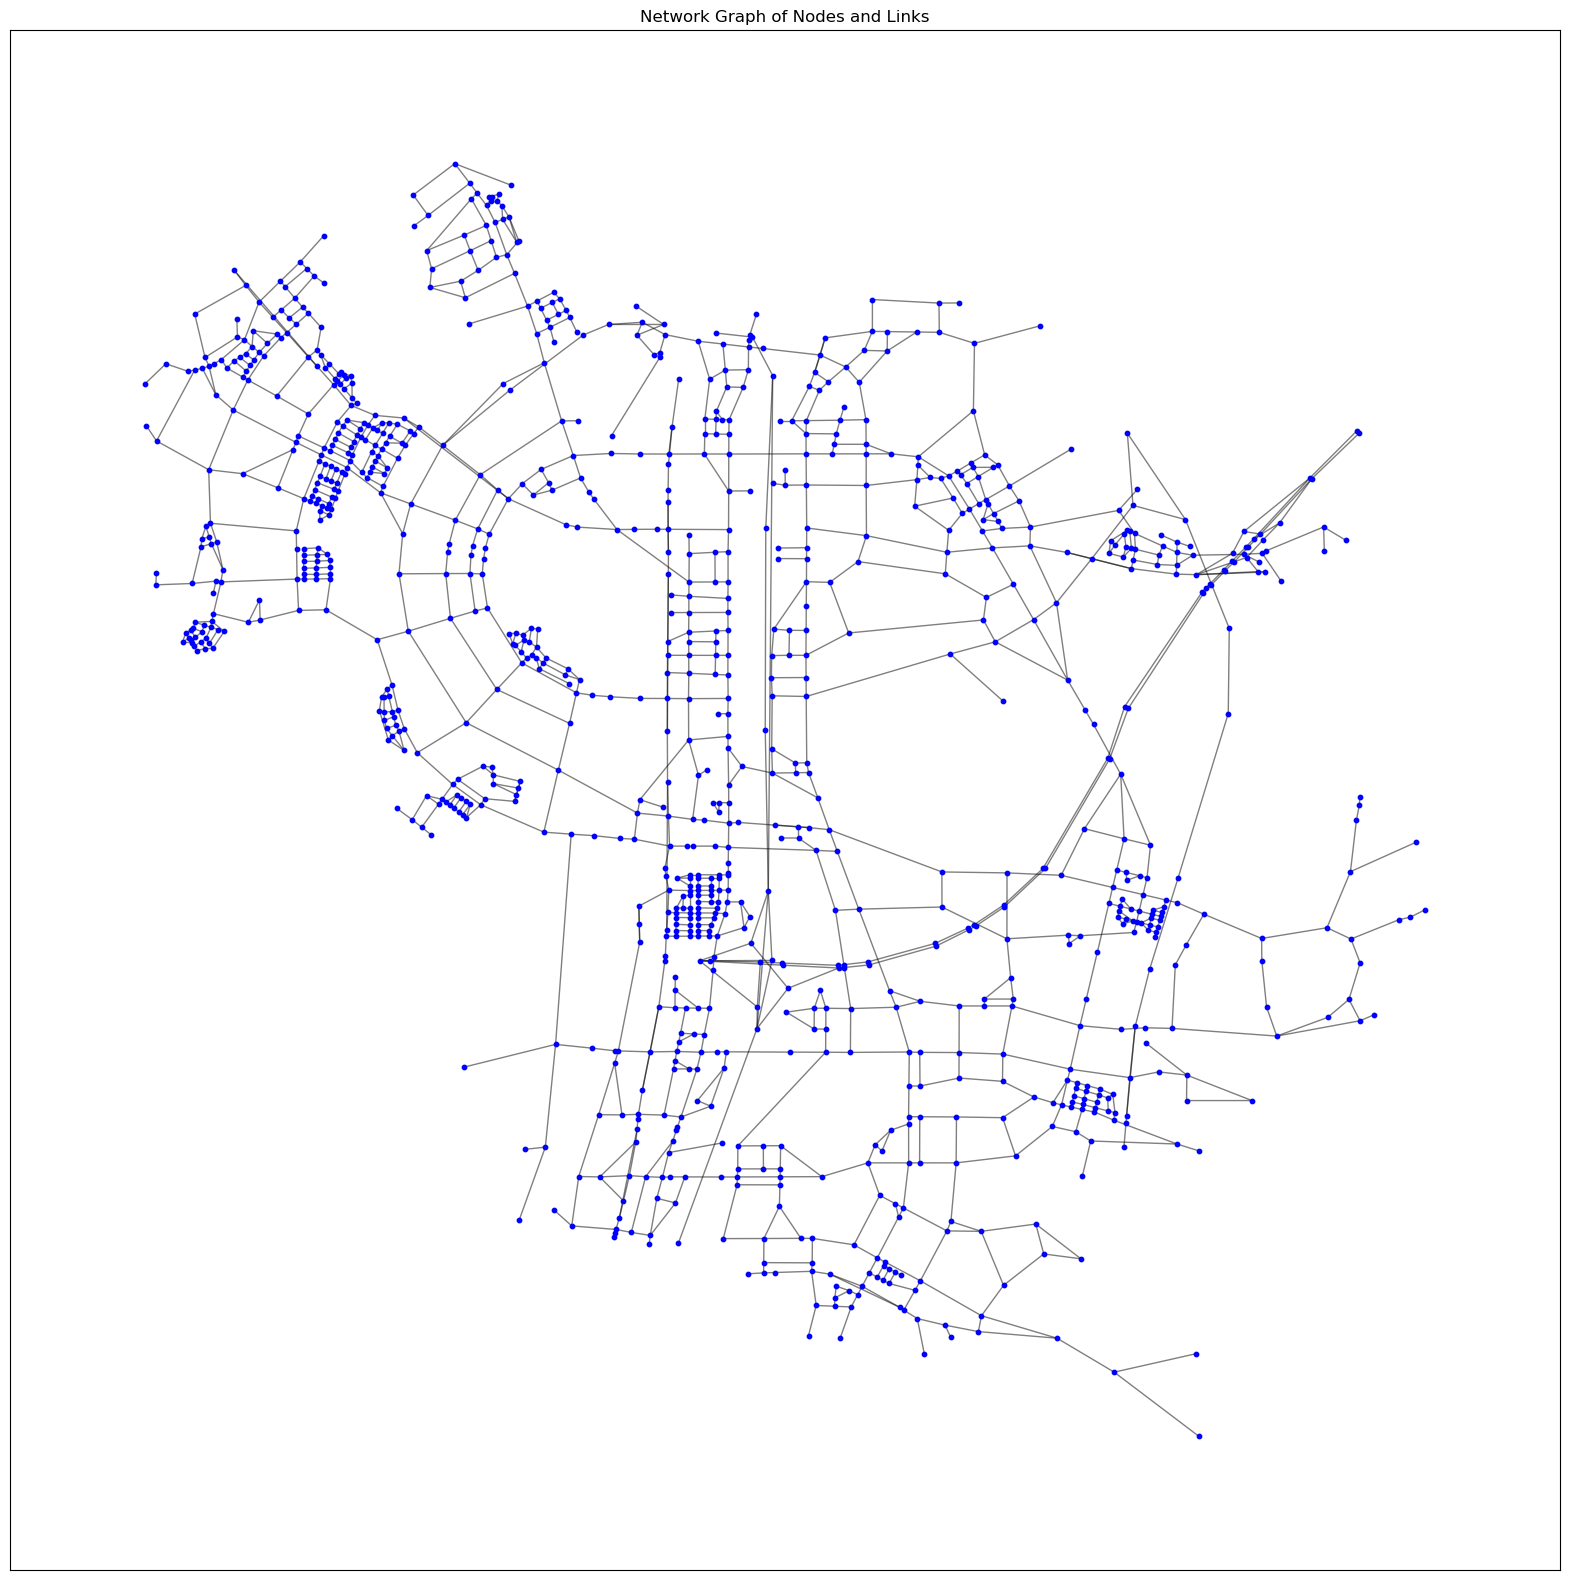

In [2]:
# link_df에서 사용되는 모든 노드 ID를 추출
link_nodes = set(link_df['F_NODE']).union(set(link_df['T_NODE']))

# node_df에 있는 노드 ID만 추출
node_ids = set(node_df['NODE_ID'])

# node_df에 존재하는 노드 ID만을 사용하여 링크 데이터 필터링
filtered_link_df = link_df[link_df['F_NODE'].isin(node_ids) & link_df['T_NODE'].isin(node_ids)]

# 네트워크 그래프 다시 생성
G = nx.Graph()

# 노드 추가 및 색상 지정
node_colors = []
for index, row in node_df.iterrows():
    G.add_node(row['NODE_ID'], pos=(row['x'], row['y']))

# 필터링된 링크 데이터로 링크 추가
for index, row in filtered_link_df.iterrows():
    spd_m_s = row['MAX_SPD'] * 1000 / 3600
    time_seconds = row['LENGTH'] / spd_m_s
    weight = round(time_seconds, 3)


pos = nx.get_node_attributes(G, 'pos')

# 그래프 크기 설정
plt.figure(figsize=(20, 20))

# 링크(엣지) 그리기
nx.draw_networkx_edges(G, pos, alpha=0.5, width=1)

# NODE_TYPE에 따라 색상 지정하여 노드 그리기
nx.draw_networkx_nodes(G, pos, node_color='blue', node_size=10)

# 그래프 표시
plt.title("Network Graph of Nodes and Links")
plt.show()

In [3]:
for u, v, attr in G.edges(data=True):
    print(f"엣지 ({u}, {v}): 최대 속도 = {attr['max_spd']}, 길이 = {attr['length']}, 가중치 = {attr['weight']}")

엣지 (2330451000, 2330451900): 최대 속도 = 30, 길이 = 28.530256, 가중치 = 0.264
엣지 (2330451000, 2330354501): 최대 속도 = 40, 길이 = 91.05589952, 가중치 = 0.632
엣지 (2330451000, 2330451100): 최대 속도 = 40, 길이 = 63.89156432, 가중치 = 0.444
엣지 (2330451000, 2330451700): 최대 속도 = 30, 길이 = 26.48067839, 가중치 = 0.245
엣지 (2330467700, 2330468500): 최대 속도 = 50, 길이 = 51.01707643, 가중치 = 0.283
엣지 (2330467700, 2330469300): 최대 속도 = 50, 길이 = 49.95606159, 가중치 = 0.278
엣지 (2330467700, 2330467800): 최대 속도 = 50, 길이 = 82.5974015, 가중치 = 0.459
엣지 (2330467700, 2330467600): 최대 속도 = 50, 길이 = 41.06501249, 가중치 = 0.228
엣지 (2330531201, 2330462000): 최대 속도 = 50, 길이 = 471.2699454, 가중치 = 2.618
엣지 (2330531201, 2330531101): 최대 속도 = 50, 길이 = 44.89677771, 가중치 = 0.249
엣지 (2330539100, 2330539300): 최대 속도 = 40, 길이 = 241.1641646, 가중치 = 1.675
엣지 (2330539100, 2330538900): 최대 속도 = 40, 길이 = 156.1926442, 가중치 = 1.085
엣지 (2330540000, 2330539800): 최대 속도 = 50, 길이 = 262.7067406, 가중치 = 1.459
엣지 (2330540000, 2330540200): 최대 속도 = 50, 길이 = 183.3864967, 가중치 = 1.019
엣지 (23305

In [4]:
data = json_graph.node_link_data(G)
with open('graph.json', 'w') as f:
    json.dump(data, f)